<a href="https://colab.research.google.com/github/Jmarsaki/Jmarsaki/blob/main/Modelo_predictor_de_cambio_de_curricula_digital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Modelo de análisis y predicción de necesidad de cambio de curricula digital*

Este replanteamiento del problema de la predicción de condiciones ideales para un cambio de currícula digital, se orientará explorar las posibilidades de un modelo predictivo basado en el algoritmo de regresión logística.

Se constato que se posee una multiplicidad de variables que no estan linealmente correlacionadas y por ello se exploran relaciones basadas en el algoritmo de la regresión logística. Se elegirá, posterior a un analisís, una variable predictora numérica continua (calificación promedio), que ajustada sirva para configurar la variable objeto ("0" indica menor que 7, mientras "1" indica mayor que 7), que será categórica, delimitando la clase de alumnos altamente formados en ciertas competencias digitales, y con calificación igual o mayor que 7, frente a aquella clase de alumnos de baja formación menor que 7 confrontandola con los valores de las columnas Resp_tec (capacidad de respuesta tecnológica) y Comp_IT (capetencias en tecnologías de la información) que poseen valores categóricos referidos al grado de ciertas habilidades conceptuales y prácticas de dichos alumnos.

La predicción de los casos positivos debe servir para para determinar si la currícula posee los contenidos tecnológicos suficientes para conservarse, o ameritan la introducción de cambios en un momento de tiempo determinado, anticipando así ese cambio.

La Regresión Logística Simple, desarrollada por David Cox en 1958, es un método de regresión que permite estimar la probabilidad de una variable cualitativa binaria en función de una variable cuantitativa. Una de las principales aplicaciones de la regresión logística es la de clasificación binaria, en el que las observaciones se clasifican en un grupo u otro dependiendo del valor que tome la variable empleada como predictor. 

Es importante tener en cuenta que, aunque la regresión logística permite clasificar, se trata de un modelo de regresión que modela el logaritmo de la probabilidad de pertenecer a cada grupo. La asignación final se hace en función de las probabilidades predichas.
A continuación se presenteran cada etapa o paso necesario para la implementación del problema en un determinado modelo de análisis y predicción aplicando algoritmos de machine learning. Primero se importan las librerías y se recuperan las variables para conformar la variable predictora.

#     MODELO APLICANDO REGRESIÓN LOGÍSTICA

**Se importan los módulos de librerías requeridas**

In [ ]:
# importación de librerias
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sb

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.weightstats import ttest_ind
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#Etapa n° 1: Adquisición de datos

**Se genera el dataset**

In [ ]:
# Se suben los datos
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn.csv to DF_GradRespTecn (5).csv
User uploaded file "DF_GradRespTecn.csv" with length 8715 bytes


In [ ]:
# Se crea el dataframe
df=pd.read_csv("DF_GradRespTecn.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


**Se elige "promedio" como variable predictora mientras que "Comp_TI" es tomada como como variable objeto.**

In [ ]:
db= df[["promedio", "Comp_TI"]]
db

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


# Etapa n° 2: limpieza de datos

**Se eliminan los valores nulos**

In [ ]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


# Etapa n° 3: Featurización de los datos

In [ ]:
db.isna().value_counts(dropna=False)

Validar_inf  Uso_adecuado_tecnologíaadt  Espacios_virtuales  promedio  Resp_tec  Comp_TI
False        False                       False               False     False     False      266
dtype: int64

La columna "promedio" (variabe predictora suma de las variables tenidas en cuenta) es continua, mientras que las columnas "Resp_tec" o "Comp_IT": (variables objetos) eran discretas, con los siguientes valores a la etiqueta: 0– 1– 2- 3- 4



Las clases serián:

"0" : No hay datos

"1" : Con ayuda de otros, puedo identificar herramientas digitales sencillas y posibles respuestas tecnológicas para resolver esas necesidades

"2" : Por mi cuenta, puedo seleccionar algunas herramientas digitales y posibles respuestas tecnológicas para resolver esas necesidades

"3" : Incluyendo el apoyo a otros, puedo aplicar diferentes herramientas digitales y posibles respuestas tecnológicas para resolver necesidades digitales

"4" : En un nivel altamente especializado, puedo crear soluciones a problemas críticos relacionados con el uso de herramientas digitales y posibles respuestas tecnológicas, y adaptar y personalizar los entornos digitales a las necesidades personales

Se tomaron estas clases y se las redujo a solo dos: 

"1": Al menos puedo seleccionar algunas herramientas digitales y posibles respuestas tecnológicas para resolver necesidades digitales, solo por mi cuenta.

"0": Otro caso.

La multiplicidad de predictores se reducen a solo el predictor "promedio" y como variable objeto a "Comp_TI" con lo cual se aplicará una regresión logistica simple.

Se calculan parámetros estadísticos

In [ ]:
df.describe() 

,Validar_inf,Uso_adecuado_tecnologíaadt,promedio,Resp_tec,Comp_TI
count,266.000000,266.000000,266.000000,266.000000,266.000000
mean,7.063910,6.793233,6.763158,0.740602,0.827068
std,2.656365,2.737323,2.353837,0.439131,0.378902
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,5.000000,5.000000,0.000000,1.000000
50%,8.000000,7.000000,7.333333,1.000000,1.000000
75%,9.000000,9.000000,8.500000,1.000000,1.000000
max,10.000000,10.000000,10.000000,1.000000,1.000000


Se separan las columnas a utilizar

In [ ]:
db[["promedio",	"Comp_TI"]]

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


Se realiza la limpieza de datos

**Visualización de de las clases "0" y clase "1"**

 Para una visualización y mejor comprensión de las características de la información con la que se trabaja y su correlación, se desarrolla la parte gráfica

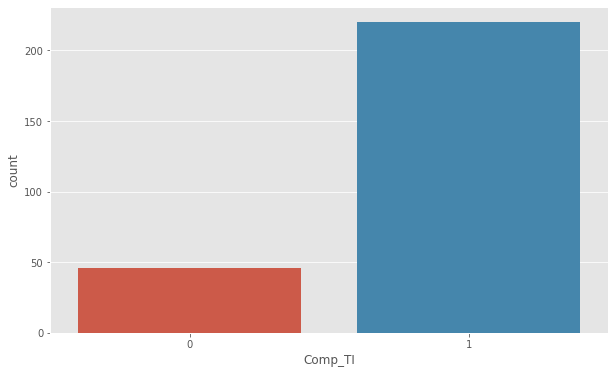

In [ ]:
sns.countplot(x="Comp_TI", data=df)

De esto se deduce que el conjunto de que la cantidad de casos "0" es menor que los casos de la clase "1".

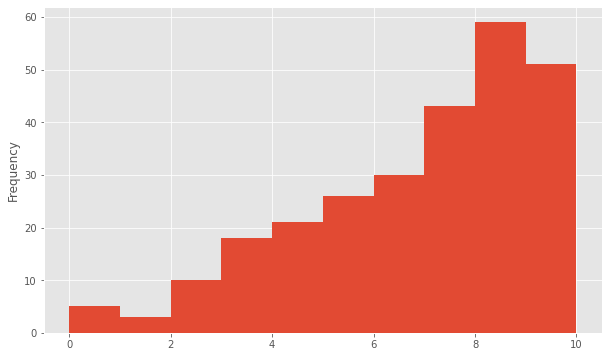

In [ ]:
df["promedio"].plot.hist()

#Etapa n° 4: Creación del modelo

Se calcula la regresión logística aplicando su algoritmo clasificando y entrenando el algoritmo

In [ ]:
X= db.drop("Comp_TI", axis=1)
y= db["Comp_TI"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2 , random_state=1)

**Se aplica finalmente el algoritmo de regresión logistica**




In [ ]:
logmodel=LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
logmodel.score

<bound method ClassifierMixin.score of LogisticRegression()>

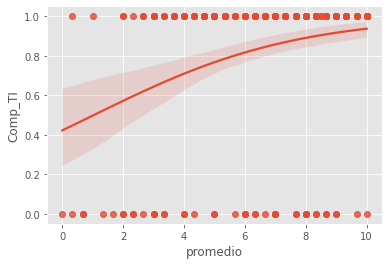

In [ ]:
# Gráfico del modelo
# ==============================================================================
#trazar la curva de regresión logística de puntos 

sns.regplot(x='promedio', y='Comp_TI', data=df, logistic=True)


#Etapa n° 5: Evaluación de métricas del modelo

In [ ]:
predictions=logmodel.predict(X_train)

In [ ]:
predictions_test=logmodel.predict(X_test)

#Accuracy de testeo y entrenamiento

In [ ]:
print('accuracy in train:', accuracy_score(predictions, y_train))

accuracy in train: 0.8443396226415094


In [ ]:
print('accuracy in test:', accuracy_score(predictions_test, y_test))

accuracy in test: 0.8333333333333334


Se hacen predicciones usando el modelo

In [ ]:
A=y_test.to_numpy()

In [ ]:
A

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [ ]:
predictions_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

***Resultado de la evaluación del modelo***

#Accuracy y precisión del modelo

In [ ]:
target_names = ["fiable", "no_fiable"]
print(classification_report(predictions_test, y_test, target_names=target_names))

              precision    recall  f1-score   support

      fiable       0.22      0.50      0.31         4
   no_fiable       0.96      0.86      0.91        50

    accuracy                           0.83        54
   macro avg       0.59      0.68      0.61        54
weighted avg       0.90      0.83      0.86        54



In [ ]:
#Calculo la exactitud o accuracy del modelo desde sklearn
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, predictions_test)
print('Accuracy del modelo:')
print(exactitud)

Accuracy del modelo:
0.8333333333333334


In [ ]:
#Calculo la precisión del modelo desde sklearn
from sklearn.metrics import precision_score

precision = precision_score(y_test, predictions_test)
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.86


#Errores de entranamiento y testeo del modelo

In [ ]:
# Error de entrenamiento del modelo 
#-------------------------------------------------------------------------------
prediction = logmodel.predict(X = X_train)

rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = prediction,
        squared = True
       )

print(f"El error (rmse) de train es: {rmse}")  

El error (rmse) de train es: 0.15566037735849056


In [ ]:
# Error de test del modelo 
#-------------------------------------------------------------------------------
prediction = logmodel.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction,
        squared = True
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.16666666666666666


#Matríz de confusión

Ahora se calcula la matríz de confusión



In [ ]:
confusion_matrix(predictions_test, y_test)

array([[ 2,  2],
       [ 7, 43]])

En la diagonal principal con a= 2 y d= 43 se muestran los casos en que el modelo ha estimado de forma correcta, mientras que en la otra diagonal con b= 2 y c= 7 se muestran los casos en los que el modelo se ha equivocado.

#Etapa n° 6: Evaluación del modelo

En conclusión, se puede decir que la eficiencia en exactitud y predicción, tanto en testeo, entrenamiento o el modelo, es superior al 83 %,  con lo cual el modelo es aceptable para predecir los casos positivos con promedio mayor o igual que 7 de promedio, mientras que su error cuadratico medio (rmse) será mas aceptable en la medida que más se acerque a cero y en este caso, su valor es próximo a 0,15  por lo tanto creeemos que el modelo cumple con las expectativas. Otro indicativo es la matriz de confusión que muestra que los casos que se estiman correctamente son más que los lo hacen erroneamente. Por lo cual, si bien se requiere mejoras en el modelo el mismo es aceptable, cumpliendo ciertas espectativas satisfactoriamente. Ahora se compararán estos resultados con otros donde se aplican otro tipo de algoritmos del machine learning.

## **COMPARACIÓN CON LA APLICACIÓN DE OTROS MODELOS**

# *MODELO APLICANDO ÁRBOL DE DECISIÓN*



Se importan los módulos de librerias requeridos

In [2]:
# importación de librerias
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
# Configuración de más librería Sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

#Etapa n° 1: Adquisición de datos

**Se generará el dataset**

Se introducen o suben los datos en formato CSV

In [3]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn.csv to DF_GradRespTecn.csv
User uploaded file "DF_GradRespTecn.csv" with length 8715 bytes


Se crea el dataframe

In [4]:
# Crear dataframe
import pandas as pd
df=pd.read_csv("DF_GradRespTecn.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


#*Etapa* n° 2 y 3: limpieza de datos y featurado

Se eliminan los valores nulos

In [5]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


Se elegirá como variable predictora "promedio" y como variable objeto a "Comp_TI".

In [6]:
db= df[["promedio", "Comp_TI"]]
db

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [ ]:
db.isna().value_counts(dropna=False)

promedio  Comp_TI
False     False      266
dtype: int64

#Etapa n° 4: Creación del modelo

Se separan los datos de la variable predictora de la variable objeto (se toma Comp_TI) para crear modelo

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        db.drop(columns = 'Comp_TI'),
                                        db['Comp_TI'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ------------------------------------------------------------------------------
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

# Una vez que se ha definido el objeto ColumnTransformer, con el método fit()
# se aprenden las transformaciones con los datos de entrenamiento y se aplican a
# los dos conjuntos con transform(). Ambas operaciones a la vez con fit_transform().
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [8]:
X= db.drop("Comp_TI", axis=1)
y= db["Comp_TI"]

In [9]:
# X_train y y_train es para entrenamiento
# X_test y y_test es para prueba
X_train, y_train, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=30)

In [10]:
db

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [11]:
# División de los datos en train y test
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        db.drop(columns = "Comp_TI"),
                                        db["Comp_TI"],
                                        random_state = 50
                                    )
# Creación del modelo
# ------------------------------------------------------------------------------
modelo = DecisionTreeClassifier(
            max_depth         = 30,
            random_state      = 100
          )

# Entrenamiento del modelo
# ------------------------------------------------------------------------------
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30, random_state=100)

Profundidad del árbol: 9
Número de nodos terminales: 28


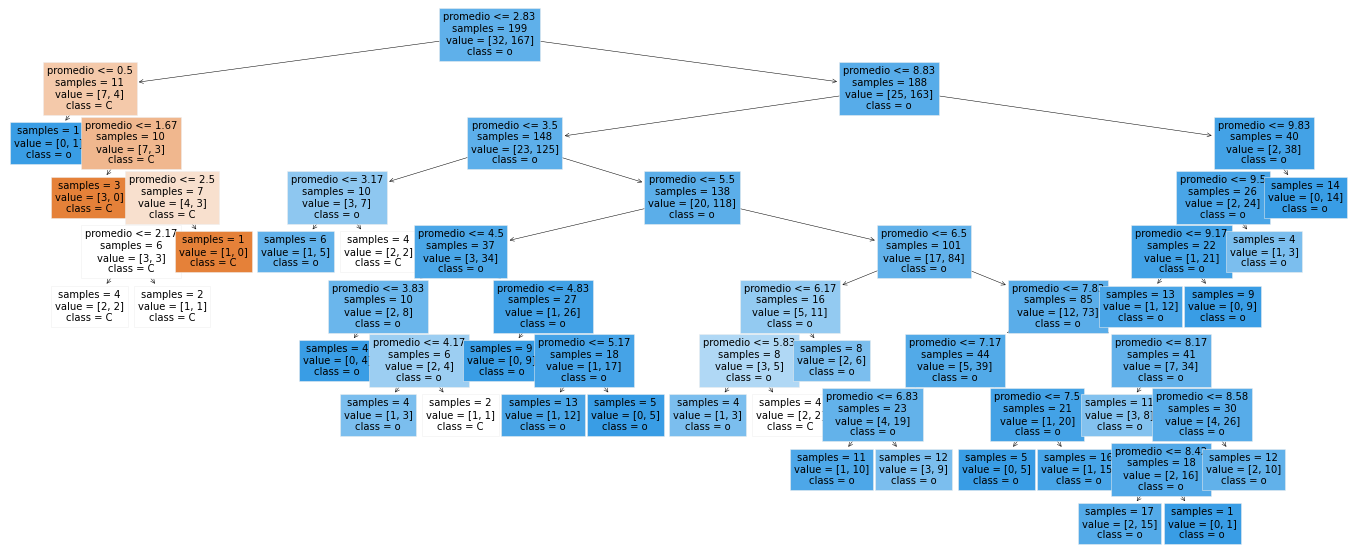

In [12]:
# Estructura del árbol creado
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(24, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
            decision_tree = modelo,
            feature_names = db.drop(columns = "Comp_TI").columns,
            class_names   = 'Comp_TI',
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )

#Etapa n° 5: Evaluación de métricas del modelo

In [13]:
texto_modelo = export_text(
                    decision_tree = modelo,
                    feature_names = list(db.drop(columns = "Comp_TI").columns)
               )
print(texto_modelo)

|--- promedio <= 2.83
|   |--- promedio <= 0.50
|   |   |--- class: 1
|   |--- promedio >  0.50
|   |   |--- promedio <= 1.67
|   |   |   |--- class: 0
|   |   |--- promedio >  1.67
|   |   |   |--- promedio <= 2.50
|   |   |   |   |--- promedio <= 2.17
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- promedio >  2.17
|   |   |   |   |   |--- class: 0
|   |   |   |--- promedio >  2.50
|   |   |   |   |--- class: 0
|--- promedio >  2.83
|   |--- promedio <= 8.83
|   |   |--- promedio <= 3.50
|   |   |   |--- promedio <= 3.17
|   |   |   |   |--- class: 1
|   |   |   |--- promedio >  3.17
|   |   |   |   |--- class: 0
|   |   |--- promedio >  3.50
|   |   |   |--- promedio <= 5.50
|   |   |   |   |--- promedio <= 4.50
|   |   |   |   |   |--- promedio <= 3.83
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- promedio >  3.83
|   |   |   |   |   |   |--- promedio <= 4.17
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- promedio >  4.17
|   |   |   

In [30]:
importancia_predictores = pd.DataFrame(
                            {'predictor': db.drop(columns ="Comp_TI").columns,
                             'importancia': modelo.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=True)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,promedio,1.0


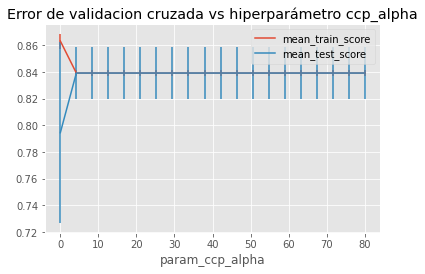

In [16]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = None,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 123
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )

grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparámetro ccp_alpha");

In [17]:
drop_elements = []
Comp_TI = db.drop(drop_elements, axis = 1)

In [18]:
db[["Comp_TI"]]
db

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [19]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(Comp_TI))
depth_range = range(1, max_attributes + 1)
 
 
accuracies = list()
max_attributes = len(list(Comp_TI))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:3.5})
    for train_fold, valid_fold in cv.split(Comp_TI):
        f_train = Comp_TI.loc[train_fold] 
        f_valid = Comp_TI.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['Comp_TI'], axis=1), 
                               y = f_train["Comp_TI"]) 
        valid_acc = model.score(X = f_valid.drop(['Comp_TI'], axis=1), 
                                y = f_valid["Comp_TI"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
dt = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
dt = dt[["Max Depth", "Average Accuracy"]]
print(dt.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.827066
         2          0.823219


In [20]:
# Error de test del modelo 
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_test)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = True
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 0.3283582089552239


In [21]:
# Error de entrenamiento del modelo 
#-------------------------------------------------------------------------------
predicciones = modelo.predict(X = X_train)

rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = predicciones,
        squared = True
       )

print(f"El error (rmse) de train es: {rmse}")

El error (rmse) de train es: 0.1407035175879397


In [22]:
X_train

,promedio
209,9.666667
12,8.000000
202,7.666667
82,6.000000
223,9.666667
...,...
229,7.666667
70,8.333333
132,7.000000
109,6.333333


In [23]:
X_test

,promedio
88,8.000000
151,8.000000
190,10.000000
127,2.666667
63,9.333333
...,...
157,6.000000
8,2.666667
155,8.000000
96,4.333333


In [24]:
y_train

209    1
12     1
202    1
82     0
223    1
      ..
229    1
70     1
132    1
109    1
176    1
Name: Comp_TI, Length: 199, dtype: int64

In [25]:
y_test

88     0
151    1
190    1
127    1
63     1
      ..
157    1
8      1
155    1
96     1
215    0
Name: Comp_TI, Length: 67, dtype: int64

In [26]:
# Pruning (const complexity pruning) por validación cruzada
# ------------------------------------------------------------------------------
# Valores de ccp_alpha evaluados
param_grid = {'ccp_alpha':np.linspace(0, 80, 20)}

# Búsqueda por validación cruzada
grid = GridSearchCV(
        # El árbol se crece al máximo posible para luego aplicar el pruning
        estimator = DecisionTreeClassifier(
                            max_depth         = 3,
                            min_samples_split = 2,
                            min_samples_leaf  = 1,
                            random_state      = 50
                       ),
        param_grid = param_grid,
        cv         = 10,
        refit      = True,
        return_train_score = True
      )
grid 

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=50),
             param_grid={'ccp_alpha': array([ 0.        ,  4.21052632,  8.42105263, 12.63157895, 16.84210526,
       21.05263158, 25.26315789, 29.47368421, 33.68421053, 37.89473684,
       42.10526316, 46.31578947, 50.52631579, 54.73684211, 58.94736842,
       63.15789474, 67.36842105, 71.57894737, 75.78947368, 80.        ])},
             return_train_score=True)

#Etapa n° 6: Evaluación del modelo

Este modelo tiene el error cuadrático medio (rmse) de entrenamiento y testeo menor al 0,33 y las accuracy de entrenamiento y testeo superior al 82% por ciento. Se puede decir que este modelo cumple también las expectativas. Estas medidas no parecen mejorar las que muestra el modelo anterior. De hecho su rendimiento es inferior.

## **MODELO CON CLUSTERING**


## Modelización no supervizada



**Importar los módulos de librerias requeridos**

In [58]:
# Tratamiento de datos 
# ============================================= ================================= 
import  numpy  as  np 
import  pandas  as  pd 
from sklearn.datasets import make_blobs

# Gráficos 
# ============================================== =============================== 
import  matplotlib.pyplot  as  plt 
from  matplotlib  import  style 
style.use('ggplot') or plt.style.use('ggplot')

# Preprocesado y modelado 
# ============================================= ================================= 
from  sklearn.cluster  import  DBSCAN 
from  sklearn.preprocessing  import  scale 
from  sklearn.metrics  import  silhouette_score
from scipy.spatial import distance
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.mixture import GaussianMixture


# Advertencias de configuración 
# ============================================================================= 
import warnings
warnings.filterwarnings('ignore')

#Etapa n° 1: Adquisición de datos

**Se generará el dataset**

In [59]:
# Se suben los datos
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn.csv to DF_GradRespTecn (3).csv
User uploaded file "DF_GradRespTecn.csv" with length 8715 bytes


Crear dataframe

In [60]:
# Crear dataframe
import pandas as pd
df=pd.read_csv("DF_GradRespTecn.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


#*Etapa* n° 2 y 3: limpieza de datos y featurado

Se eliminan valores nulos

In [61]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [62]:
# Crear dataframe
import pandas as pd
df=pd.read_csv("DF_GradRespTecn.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [63]:
df[["promedio",	"Comp_TI"]]

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


Se realiza la limpieza de datos

In [64]:
db.isna().value_counts(dropna=False)

Validar_inf  Uso_adecuado_tecnologíaadt  Espacios_virtuales  promedio  Resp_tec  Comp_TI
False        False                       False               False     False     False      266
dtype: int64

In [65]:
# Escalado de datos
# ==============================================================================
X = db.drop(columns='Comp_TI').to_numpy()
X_scaled = scale(X)
X

array([[7, 0, 5.0, 4.0, 1],
       [3, 5, 4.0, 4.0, 0],
       [10, 5, 4.0, 6.3333333333333, 1],
       ...,
       [7, 7, 7.0, 7.0, 0],
       [5, 7, 6.0, 6.0, 1],
       [2, 8, 3.0, 4.3333333333333, 1]], dtype=object)

In [66]:
df[["promedio",	"Resp_tec"]]

,promedio,Resp_tec
0,4.000000,1
1,4.000000,0
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


#Etapa n° 4: Creación del modelo

In [67]:
# Modelo
# ==============================================================================
modelo_dbscan = DBSCAN(
                    eps          = 0.2,
                    min_samples  = 5,
                    metric       = 'euclidean',
                )

modelo_dbscan.fit(X=X_scaled)

DBSCAN(eps=0.2)

Se realiza y grafica la clasificación para entrenamiento y testeo

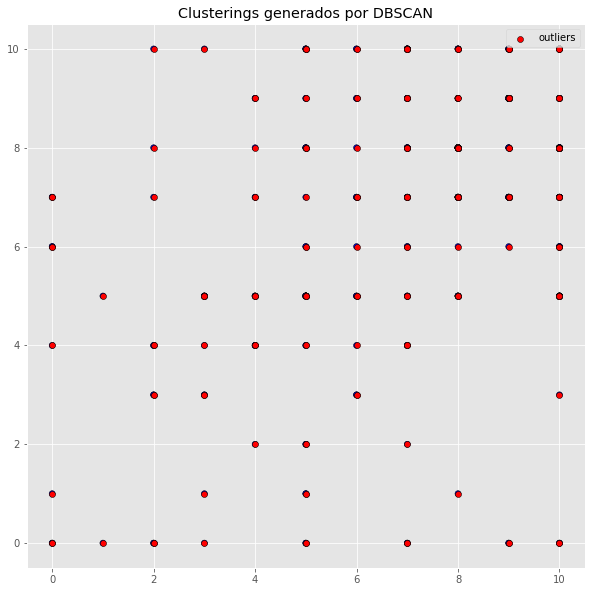

In [68]:
# Clasificación
# ==============================================================================
labels = modelo_dbscan.labels_

fig, ax = plt.subplots(1, 1, figsize=(10.0, 10.0))

ax.scatter(
    x = X[:, 0],
    y = X[:, 1], 
    c = labels,
    marker    = 'o',
    edgecolor = 'black'
)

# Los outliers se identifican con el label -1
ax.scatter(
    x = X[labels == -1, 0],
    y = X[labels == -1, 1], 
    c = 'red',
    marker    = 'o',
    edgecolor = 'black',
    label = 'outliers'
)

ax.legend()
ax.set_title('Clusterings generados por DBSCAN');

In [55]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=2.5, min_samples=4).fit(df)
# get cluster labels
clusters.labels_

array([-1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0

In [56]:
# check unique clusters
set(clusters.labels_)

{-1, 0}

#Etapa n° 5: Evaluación de métricas del modelo

In [51]:
# Número de clusters y observaciones "outliers"
# ==============================================================================
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise    = list(labels).count(-1)

print(f'Número de clusters encontrados: {n_clusters}')
print(f'Número de outliers encontrados: {n_noise}')

Número de clusters encontrados: 5
Número de outliers encontrados: 217


Este caso al ser modelización no supervisada tiene métricas diferentes y dificiles de comparar con las del primer modelo. El criterio de uso de él es más restringido por lo que se diría que se debe usar en situaciones especiales.

##**Otra modelización con clustering pero tambien con dbscan**

## **MODELO CON RAMDOM FOREST**

Se importar los módulos de librerias requeridos

In [74]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling

from matplotlib import rcParams
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')
import warnings
warnings.filterwarnings("ignore")

#Etapa n° 1: Adquisición de datos

Se generará el dataset

In [75]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving DF_GradRespTecn.csv to DF_GradRespTecn (4).csv
User uploaded file "DF_GradRespTecn.csv" with length 8715 bytes


In [76]:
# Se crea el dataframe
import pandas as pd
import numpy as np
df=pd.read_csv("DF_GradRespTecn.csv")
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


se quitan los elementos nulos

In [77]:
db=df.dropna() 
db

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


Obtenemos la información del dataframe

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Validar_inf                 266 non-null    int64  
 1   Uso_adecuado_tecnologíaadt  266 non-null    int64  
 2   Espacios_virtuales          266 non-null    object 
 3   promedio                    266 non-null    float64
 4   Resp_tec                    266 non-null    int64  
 5   Comp_TI                     266 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 12.6+ KB


In [79]:
df[["promedio",	"Comp_TI"]]

,promedio,Comp_TI
0,4.000000,1
1,4.000000,1
2,6.333333,1
3,9.000000,1
4,4.000000,1
...,...,...
261,3.666667,1
262,9.333333,1
263,7.000000,0
264,6.000000,1


In [80]:
# Using Series.values.tolist()
col_listr = df["Comp_TI"].values.tolist()
print(col_listr)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]


#*Etapa* n° 2 y 3: limpieza de datos y featurado

Se realiza la limpieza de datos

In [81]:
db.isna().value_counts(dropna=False)

Validar_inf  Uso_adecuado_tecnologíaadt  Espacios_virtuales  promedio  Resp_tec  Comp_TI
False        False                       False               False     False     False      266
dtype: int64

In [82]:
promedio = db["promedio"]
promedio

0      4.000000
1      4.000000
2      6.333333
3      9.000000
4      4.000000
         ...   
261    3.666667
262    9.333333
263    7.000000
264    6.000000
265    4.333333
Name: promedio, Length: 266, dtype: float64

In [83]:
promedio.describe()

count    266.000000
mean       6.763158
std        2.353837
min        0.000000
25%        5.000000
50%        7.333333
75%        8.500000
max       10.000000
Name: promedio, dtype: float64

In [84]:
COMPTI= db["Comp_TI"]
COMPTI

0      1
1      1
2      1
3      1
4      1
      ..
261    1
262    1
263    0
264    1
265    1
Name: Comp_TI, Length: 266, dtype: int64

#Etapa n° 4 y 5: Creación del modelo y consideración de métricas

In [85]:
# División de los datos en train y test
# ==============================================================================
X_train, X_test, y_train, y_test = train_test_split(
                                        db.drop(columns = 'Comp_TI'),
                                        db['Comp_TI'],
                                        random_state = 123
                                    )

# One-hot-encoding de las variables categóricas
# ==============================================================================
# Se identifica el nobre de las columnas numéricas y categóricas
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()

# Se aplica one-hot-encoding solo a las columnas categóricas
preprocessor = ColumnTransformer(
                    [('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                    remainder='passthrough'
               )

Se realiza la clasificación de datos para entrenamiento y testeo

In [86]:
# tamaño de la figura en pulgadas
rcParams["figure.figsize"] = 10, 6
np.random.seed(22)

In [87]:
# Cargar conjunto de datos 
import pandas as pd
import numpy as np
df=pd.read_csv("DF_GradRespTecn.csv")  # Se crea el dataframe
df=df.replace(np.nan,"0")
df

,Validar_inf,Uso_adecuado_tecnologíaadt,Espacios_virtuales,promedio,Resp_tec,Comp_TI
0,7,0,5.0,4.000000,1,1
1,3,5,4.0,4.000000,0,1
2,10,5,4.0,6.333333,1,1
3,9,9,9.0,9.000000,1,1
4,6,3,3.0,4.000000,1,1
...,...,...,...,...,...,...
261,5,5,1.0,3.666667,1,1
262,8,10,10.0,9.333333,1,1
263,7,7,7.0,7.000000,0,0
264,5,7,6.0,6.000000,1,1


In [88]:
# mostrar columnas
df.columns

Index(['Validar_inf', 'Uso_adecuado_tecnologíaadt', 'Espacios_virtuales',
       'promedio', 'Resp_tec', 'Comp_TI'],
      dtype='object')

In [89]:
# dividir los datos en características de entrada y de destino

X = df.drop("Comp_TI", axis=1)
y = df["Comp_TI"]

In [90]:
# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [91]:
# dividir en conjunto de entrenamiento (train) y 
#conjunto de prueba (test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, stratify=y, test_size=0.10, random_state=22)

In [92]:
# crear el clasificador
classifier = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo usando el conjunto de entranamiento
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
# predicción en el conjunto de prueba
y_pred = classifier.predict(X_test)

In [96]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"feature": list(X.columns), "importance": classifier.feature_importances_}
).sort_values("importance", ascending=False)

# Mostrar
feature_importances_df

,feature,importance
3,promedio,0.314354
2,Espacios_virtuales,0.197066
0,Validar_inf,0.193941
1,Uso_adecuado_tecnologíaadt,0.178808
4,Resp_tec,0.115831


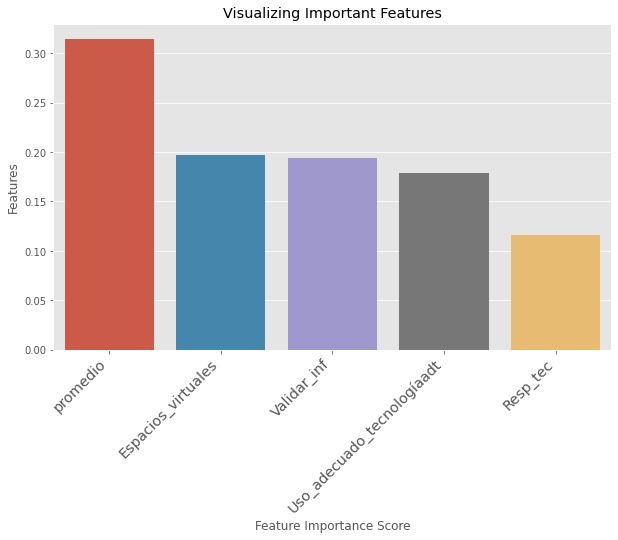

In [97]:
# visualizarcaracterísticas importantes

# Crear un diagrama de barras
sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
# agregar estiquestas

plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.xticks(
    rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large"
)
plt.show()

In [98]:
# cargar datos con características seleccionadas
X = df.drop(["Comp_TI", "Validar_inf"], axis=1)
y = df["Comp_TI"]

# estandarizar el conjunto de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# dividir en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(
X_scaled, y, stratify=y, test_size=0.10, random_state=22)


In [99]:
# crear clasificador
clf = RandomForestClassifier(n_estimators=100)

# Entrenar el modelo usando el conjunto de entrenamiento
clf.fit(X_train, y_train)

# predicción en el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión del modelo,
print("Precisión:", accuracy_score(y_test, y_pred))

Precisión: 0.7407407407407407


#La etapa n°6 : Pequeño análisis

La precisión del modelo es notablemente más baja que el de regresión logística por lo cuál el primer modelo sigue siendo preferible.

#Conclusión

#De todo este análisis comparativo entre modelos, se puede decir que el modelo de regresión logística tanto por las características de adaptabilidad, utilidad más los valores de precisión, exactitud y medida de error es preferible al resto.